# Авторы
Студенты группы M3439:

- Тепляков Валерий
- Плешаков Алексей
- Филипчик Андрей

# Source code
Исходный код можно посмотреть [тут](https://github.com/Mervap/OptimizationMethods/tree/master/lab3)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Задание 1

# Вопросы

1. Общая и каноническая форма задачи линейного программирования

Общая форма:
$$
\begin{cases}
  \sum\limits_{j=1}^n c_j x_j \rightarrow max, \\
  \sum a_{ij} x_j \leqslant b_i,~i=\overline{1,m_1}, \\
  \sum a_{ij} x_j \geqslant b_i,~i=\overline{m_1+1,m_2}, \\
  \sum a_{ij} x_j = b_i,~ i=\overline{m_2+1,m}.
\end{cases}
$$

Каноническая форма (только равенство + неотрицательность):
$$
\begin{cases}
  \sum\limits_{j=1}^n c_j x_j \rightarrow max, \\
  \sum a_{ij} x_j = b_i,~ i=\overline{1,m}, \\
  x_i \geqslant 0,~\forall i.
\end{cases}
$$

2. Методы естрественного базиса. Метод искусственного базиса
3. Доказать, что ОДР (область допустимых решений) является выпуклым множеством
4. Может ли ОДР в задаче линейного программирования состоять из одной единственной точки? Если да, то привести пример
5. Графический метод решения задачи линейного программирования. Используя графический метод, найти решение задачи линейного программирования:
$$f(x)=-3x_1-2x_2 \rightarrow min$$
$$
\begin{cases}
  x_1 + 2x_2 \leqslant 7, \\
  2x_1+x_2 \leqslant 8, \\
  x_2 \leqslant 3, \\
  x_1 \geqslant 0,~x_2 \geqslant 0.
\end{cases}
$$

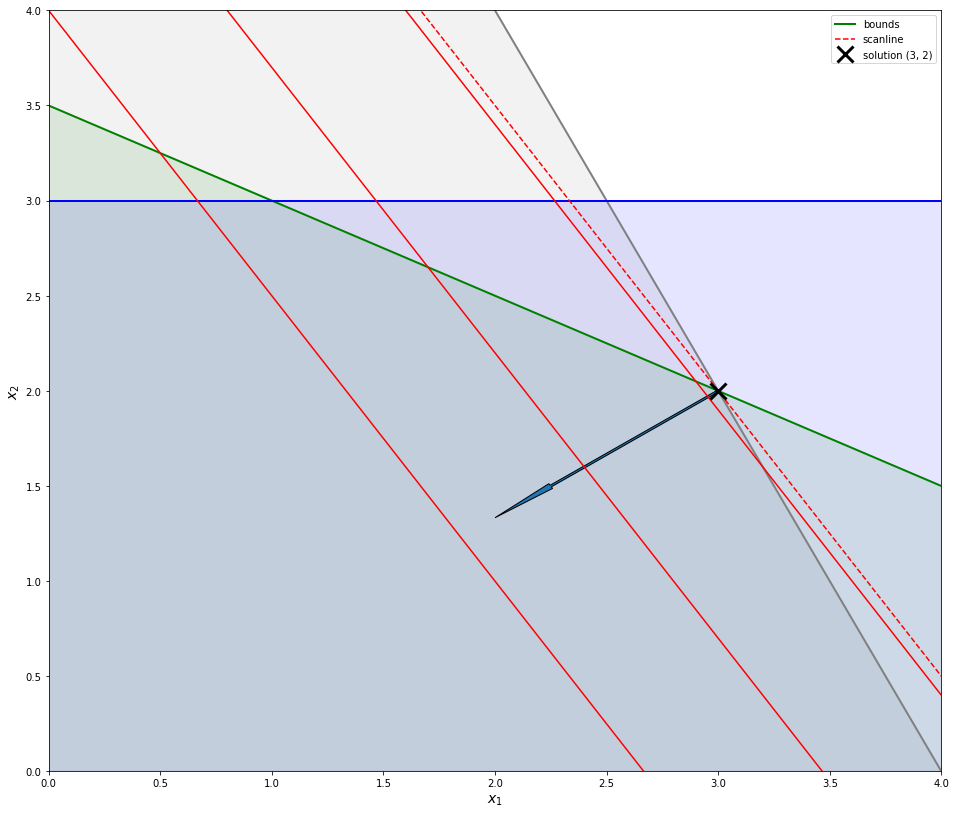

In [67]:
plt.figure(figsize=(16, 14))

xs = np.linspace(-5, 5, 1000)
f1 = (7 - xs) / 2
f2 = 8 - 2 * xs
f3 = [3 for _ in range(len(xs))]
plt.plot(xs, f1, color='g', linewidth=2, label='bounds')
plt.fill_between(xs, f1, alpha=0.1, color='g')

plt.plot(xs, f2, color='gray', linewidth=2)
plt.fill_between(xs, f2, alpha=0.1, color='gray')

plt.plot(xs, f3, color='b', linewidth=2)
plt.fill_between(xs, f3, alpha=0.1, color='b')

for b in np.linspace(4, 6.4, 3):
    plt.plot(xs, list(map(lambda x: -3/2*x + b, xs)), color='r')
plt.plot(xs, list(map(lambda x: -3/2*x + 6.5, xs)), color='r', linestyle='--', label='scanline')
plt.arrow(3, 2, -1, -2 / 3, width=0.01, head_length=0.3, length_includes_head=True)
plt.plot(3, 2, 'x', color='black', ms=16, mew=3, label='solution (3, 2)')

plt.axis([0, 4, 0, 4])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.legend()
plt.show()

6. Найти все базисы системы равенств и соответствующие им базисные решения:
$$
\begin{cases}
x_1+x_2+x_3+x_4 = 1, \
    x_1-x_2+x_3-x_4 = 1, \
    x_j \geqslant 0,~j=1,2,3,4.
\end{cases}
$$
7. В данной системе ограничений выразить базисные переменные указанного базисного допустимого решения

$\overline x=(1,2,0)^T$ через небазисные:
$$
\begin{cases}
x_1+x_2+2x_3 = 3, \
    -2x_1+3x_2+x_3 = 4, \
    x_j \geqslant 0,~j=1,2,3.
\end{cases}
$$
8. Исследовать на оптимальность решение $\overline x=(0,0,1,1)^T$ задачи:
$$f(x)=x_1+x_2-2x_3-3x_4 \rightarrow min$$
$$
\begin{cases}
2x_1-x_2+x_3 = 1, \
    -x_1+2x_2+x_4 = 1, \
    x_j \geqslant 0,~j=1,2,3,4.
\end{cases}
$$